In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_pattern = 'PRoPHET*_Message*.txt'
file_handles = [open(file_path, 'r') for file_path in glob.glob(f'../reports/{file_pattern}')]

_msg_stats = []
for fh in file_handles:
    stat = {'scenario': fh.readline().split(' ')[-1].strip()}
    for line in fh.readlines():
        elems = line.split(':')
        if len(elems) > 1:
            stat[elems[0].strip()] = elems[1].strip()
    _msg_stats.append(stat)
    fh.close()

stats_df = pd.DataFrame(_msg_stats).set_index('scenario')

In [3]:
for col in stats_df.columns:
    if col != 'scenario':
        stats_df[col] = pd.to_numeric(stats_df[col], errors='coerce')

In [4]:
stats_df

,sim_time,created,started,relayed,aborted,dropped,removed,delivered,delivery_prob,response_prob,overhead_ratio,latency_avg,latency_med,hopcount_avg,hopcount_med,buffertime_avg,buffertime_med,rtt_avg,rtt_med
scenario,,,,,,,,,,,,,,,,,,,
PRoPHET-30siu,43200.1,1463,68809,39028,29779,38948,0,401,0.2741,0.0,96.3267,4366.1100,3176.9,3.5711,3,1049.2507,518.6,NaN,NaN
PRoPHET-10siu,43200.1,1463,68826,39098,29726,39064,0,398,0.2720,0.0,97.2362,4127.3284,3179.3,3.5754,3,1052.0374,512.0,NaN,NaN
PRoPHET-50siu,43200.1,1463,70017,40206,29809,40188,0,394,0.2693,0.0,101.0457,4316.4190,3187.0,3.7792,3,1028.1873,501.3,NaN,NaN
PRoPHET-40siu,43200.1,1463,69358,39552,29804,39536,0,399,0.2727,0.0,98.1278,4206.0679,3233.1,3.5589,3,1040.0033,504.9,NaN,NaN


<AxesSubplot:xlabel='scenario'>

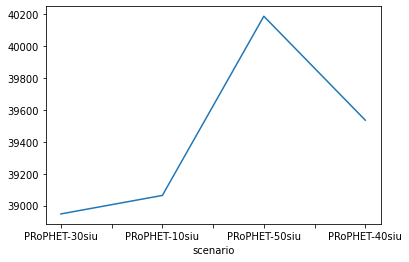

In [5]:
stats_df['dropped'].plot()